#### New York City Airbnb Data

###### Importing required libraries for data exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###### loaded the dataset into pandas to make it as a dataframe

In [2]:
df=pd.read_csv("AB_NYC_2019.csv")

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


###### Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

###### If you see the null values, only 2 columns (last_review,review_per_month) have significant null values.so we'll try to interpret it and impute the column data by other column datas and other 2 column datas are very negligible

In [8]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [20]:
a=df.corr()>0.5

In [22]:
a.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

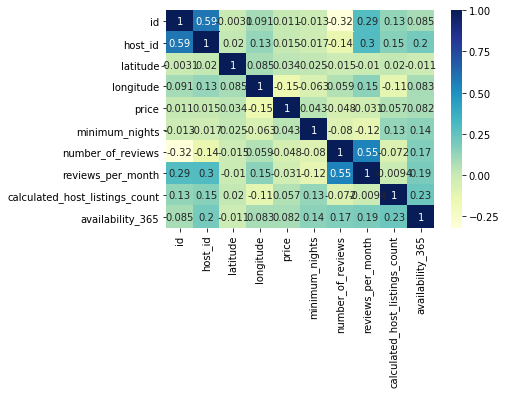

In [28]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [29]:
df['number_of_reviews'].corr(df['reviews_per_month'])

0.5498675063773883

In [31]:
df['reviews_per_month'].value_counts()

0.02     919
0.05     893
1.00     893
0.03     804
0.16     667
0.04     655
0.08     596
0.09     593
0.06     579
0.11     539
0.07     466
0.13     463
0.10     457
0.12     413
2.00     406
0.14     399
0.15     374
0.19     357
0.21     343
0.17     321
0.22     318
0.26     305
0.18     305
0.25     290
0.23     289
0.32     280
0.27     277
0.20     276
0.24     266
0.28     264
        ... 
8.40       1
7.61       1
10.28      1
9.56       1
9.83       1
11.17      1
11.91      1
14.62      1
13.27      1
8.69       1
16.22      1
27.95      1
10.36      1
7.25       1
6.39       1
12.11      1
8.79       1
7.23       1
9.97       1
11.14      1
9.24       1
9.78       1
13.42      1
6.74       1
11.21      1
10.23      1
8.94       1
6.04       1
9.21       1
10.67      1
Name: reviews_per_month, Length: 937, dtype: int64

###### Distribution plots

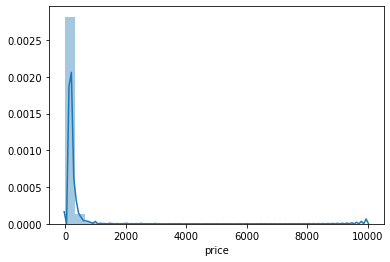

In [58]:
sns.distplot(df['price'],kde=True,bins=30)

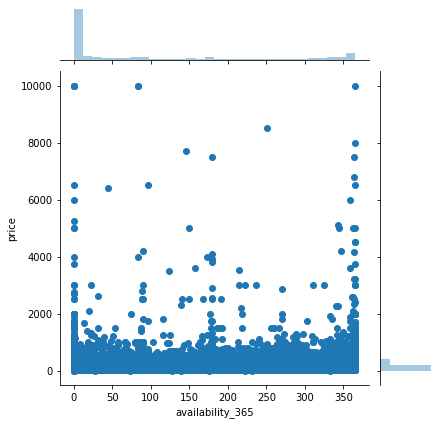

In [61]:
sns.jointplot(x='availability_365',y='price',data=df,kind='scatter')

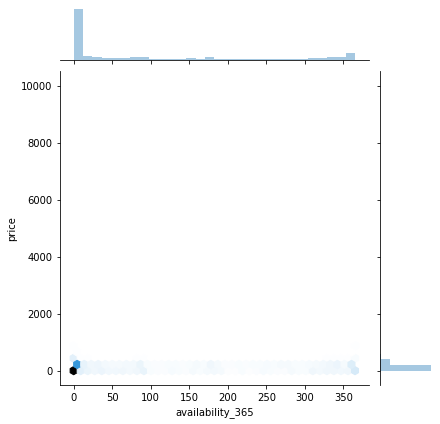

In [62]:
sns.jointplot(x='availability_365',y='price',data=df,kind='hex')

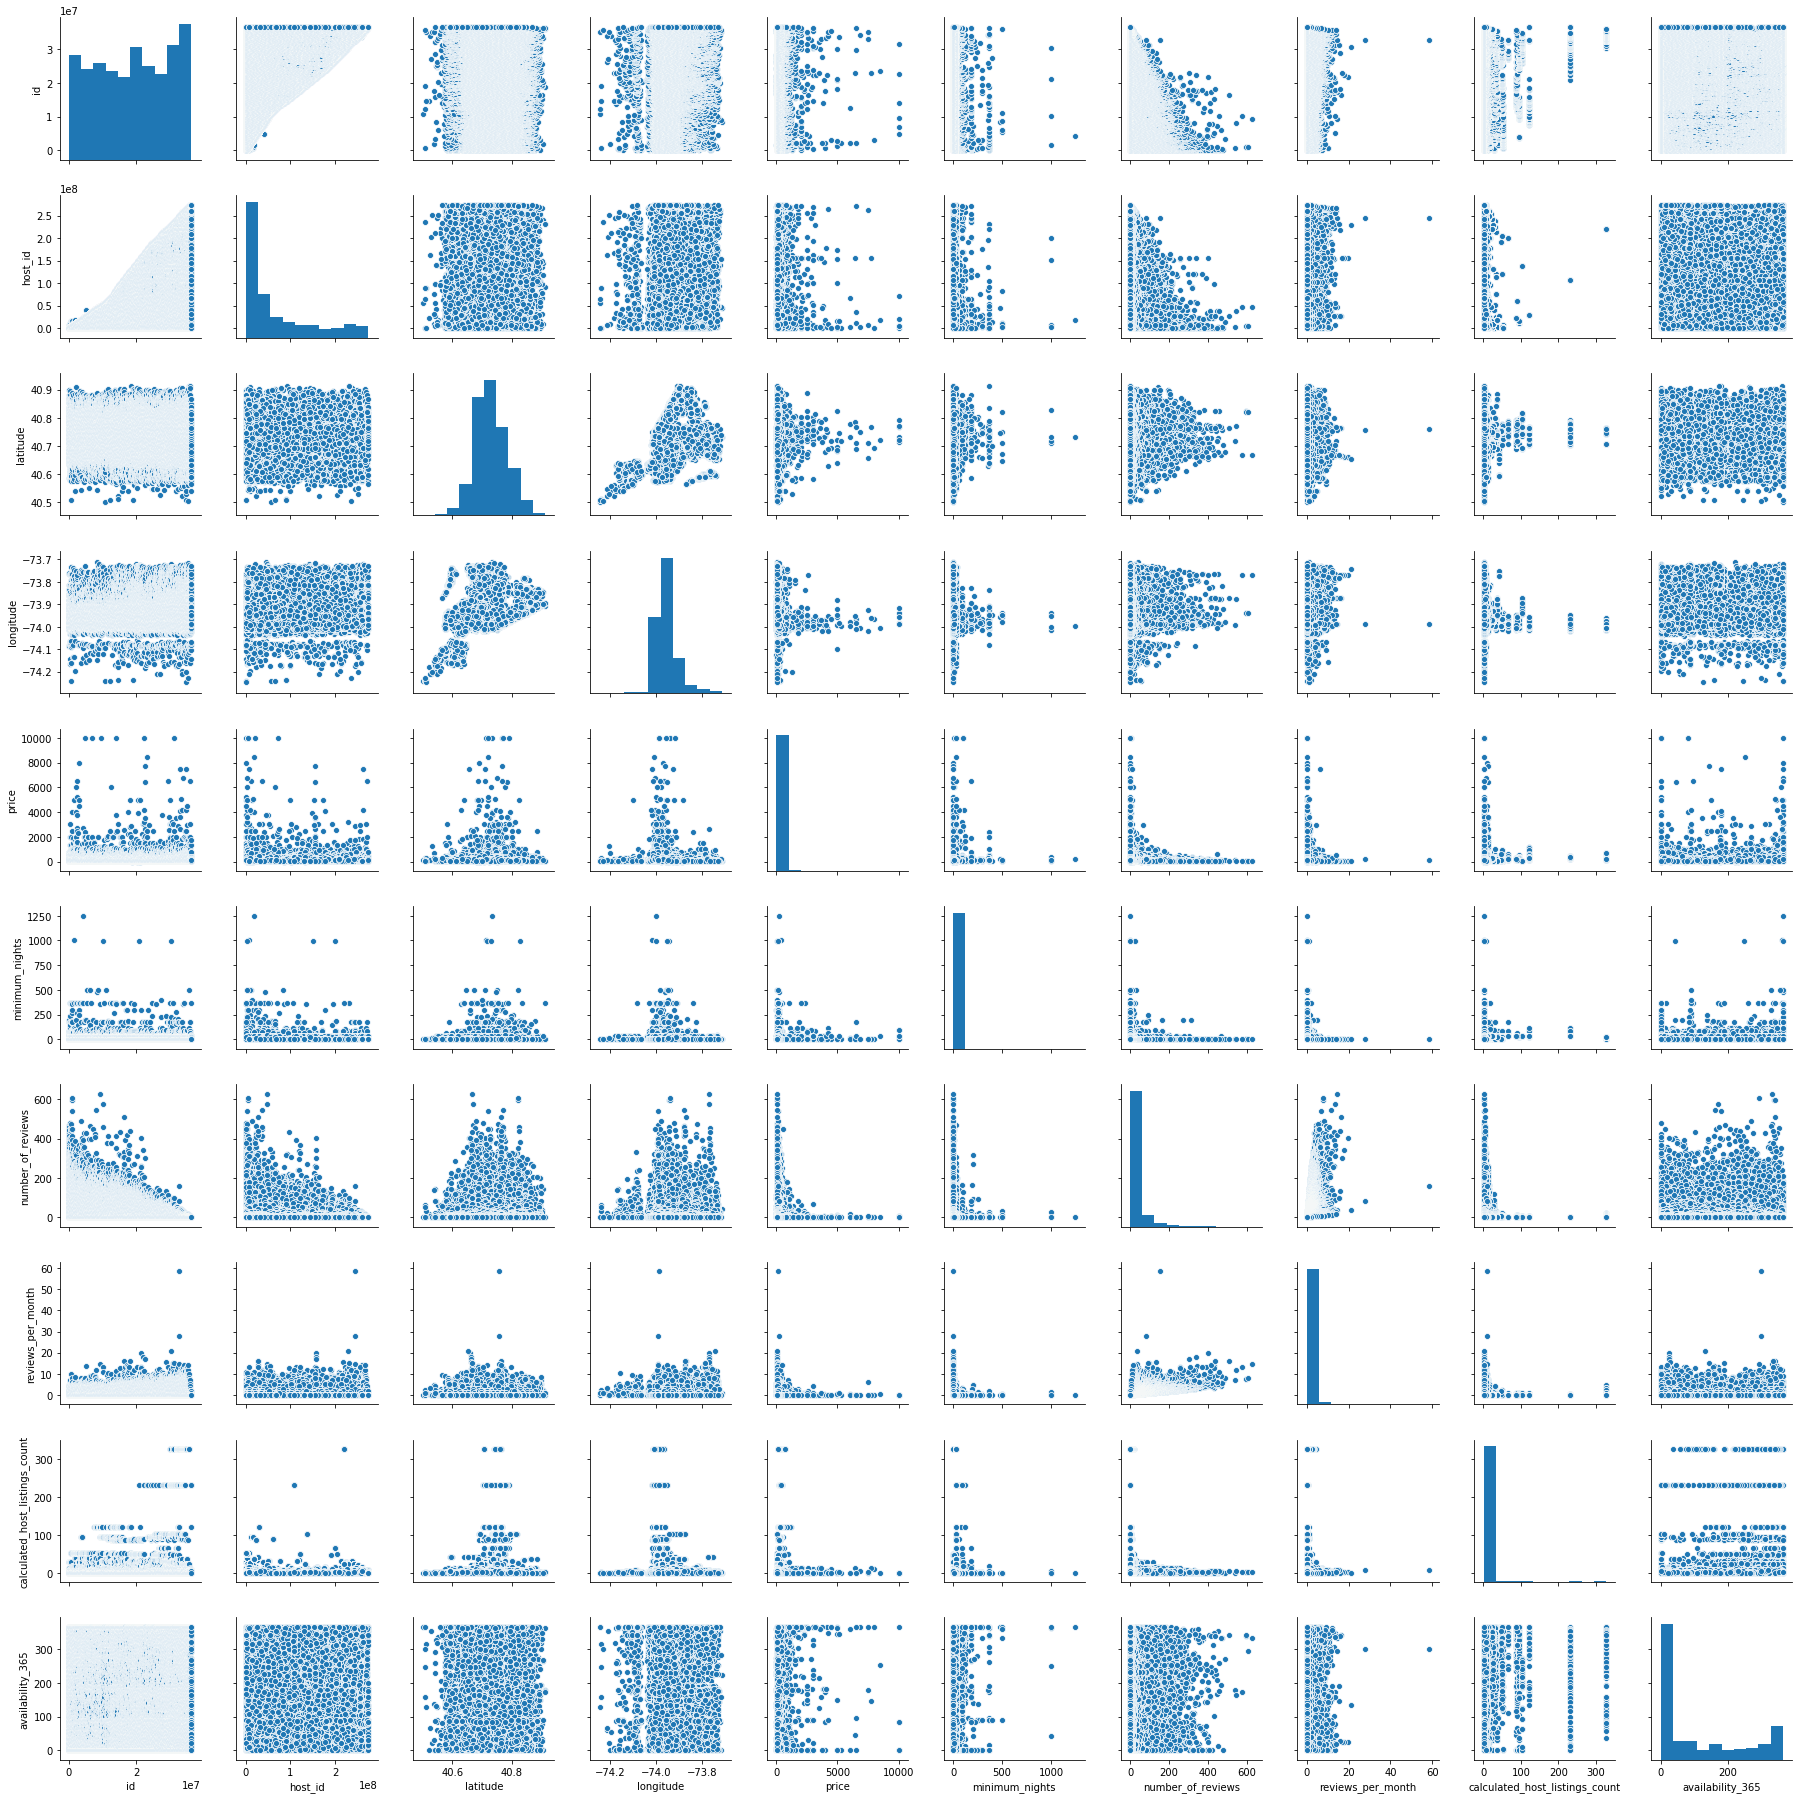

In [32]:
sns.pairplot(df.fillna(0))

In [37]:
df['reviews_per_month']=df.groupby('host_id').reviews_per_month.transform(lambda x : x.fillna(x.mean()))

In [42]:
df['reviews_per_month']=df.groupby('availability_365').reviews_per_month.transform(lambda x : x.fillna(x.mean()))

In [43]:
df['reviews_per_month'].isna().sum()

0

In [45]:
df['last_review']=df.groupby('reviews_per_month').reviews_per_month.transform(lambda x : x.fillna(x.mode()))

In [46]:
df['last_review'].isna().sum()

0

In [50]:
data=df.pop('id')

###### The final data is ready to start the modelling...:)